# k-MEANS CLUSTERING

**File:** kMeans.ipynb

**Course:** Industrial Data Mining Foundations

# IMPORT LIBRARIES

In [76]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler  # For standardizing data
import numpy as np
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# LOAD AND PREPARE DATA

In [36]:
# Reads the .csv file into variable df
data = pd.read_excel('komoditas-ekspor-impor.xlsx')
data


,Komoditas,Nilai-Ekspor-19,Berat-Ekspor-19,Nilai-Impor-19,Berat-Impor-19,Nilai-Ekspor-20,Berat-Ekspor-20,Nilai-Impor-20,Berat-Impor-20,Nilai-Ekspor-21,...,Nilai-Impor-21,Berat-Impor-21,Nilai-Ekspor-22,Berat-Ekspor-22,Nilai-Impor-22,Berat-Impor-22,Nilai-Ekspor-23 Jan-Mar,Berat-Ekspor-23 Jan-Mar,Nilai-Impor-23 Jan-Mar,Berat-Impor-23 Jan-Mar
0,[01] Binatang hidup,5.874000e+06,2680813.72,68424519,23818775,7.100932e+06,2724529.61,38804127,10520405,4.893515e+06,...,64076402,16465471,6.914435e+06,2270655.45,57240250,14840325,5.874000e+06,2680813.72,68424519,23818775
1,[02] Daging hewan,2.080212e+06,282403.80,94038467,28656206,7.258027e+05,118483.87,107316431,33571600,2.035323e+06,...,83673023,22457685,2.234884e+06,244868.47,61800880,17222040,2.080212e+06,282403.80,94038467,28656206
2,"[03] Ikan, krustasea, dan moluska",3.531471e+08,86326731.81,23710127,9055556,3.057043e+08,66236492.43,25427653,11332031,3.666886e+08,...,36115889,11673926,3.651539e+08,76007279.46,51289721,20607545,3.531471e+08,86326731.81,23710127,9055556
3,"[04] Susu, mentega, dan telur",4.776150e+07,2282264.30,127095239,51060845,8.119211e+07,3604653.85,127336820,48335598,5.352501e+07,...,152273120,51895075,4.498768e+07,4120769.81,166063105,45079226,4.776150e+07,2282264.30,127095239,51060845
4,[05] Produk hewani,1.598953e+06,1193223.71,13319862,4577710,2.276560e+06,906706.99,12804893,7114998,3.563518e+06,...,9111064,5523772,3.123249e+06,1224728.19,7154882,4793524,1.598953e+06,1193223.71,13319862,4577710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,"[95] Mainan, permainan dan keperluan olahraga",3.899014e+07,3224941.46,34023831,6991195,4.089095e+07,3634556.16,33655251,17731108,5.033843e+07,...,36864762,8999615,4.982167e+07,3844416.24,36370544,9099281,3.899014e+07,3224941.46,34023831,6991195
94,[96] Berbagai barang buatan pabrik,2.901252e+07,8679094.51,52207793,10478176,3.524859e+07,12450949.27,43230144,8301921,3.564452e+07,...,67663068,11801250,3.064025e+07,11391937.79,60823883,13222977,2.901252e+07,8679094.51,52207793,10478176
95,"[97] Karya seni, barang kolektor, dan barang a...",4.359037e+05,73543.07,1642612,81973,5.548869e+05,90000.78,253945,111107,7.373883e+05,...,258842,46023,1.503243e+06,33506.49,112802,41737,4.359037e+05,73543.07,1642612,81973
96,[98] Kendaraan bermotor dan komponennya (terbo...,0.000000e+00,0.00,52151632,6282258,0.000000e+00,0.00,20139004,1755510,0.000000e+00,...,34059455,4060880,1.134829e+04,62595.80,99539807,9545916,0.000000e+00,0.00,52151632,6282258


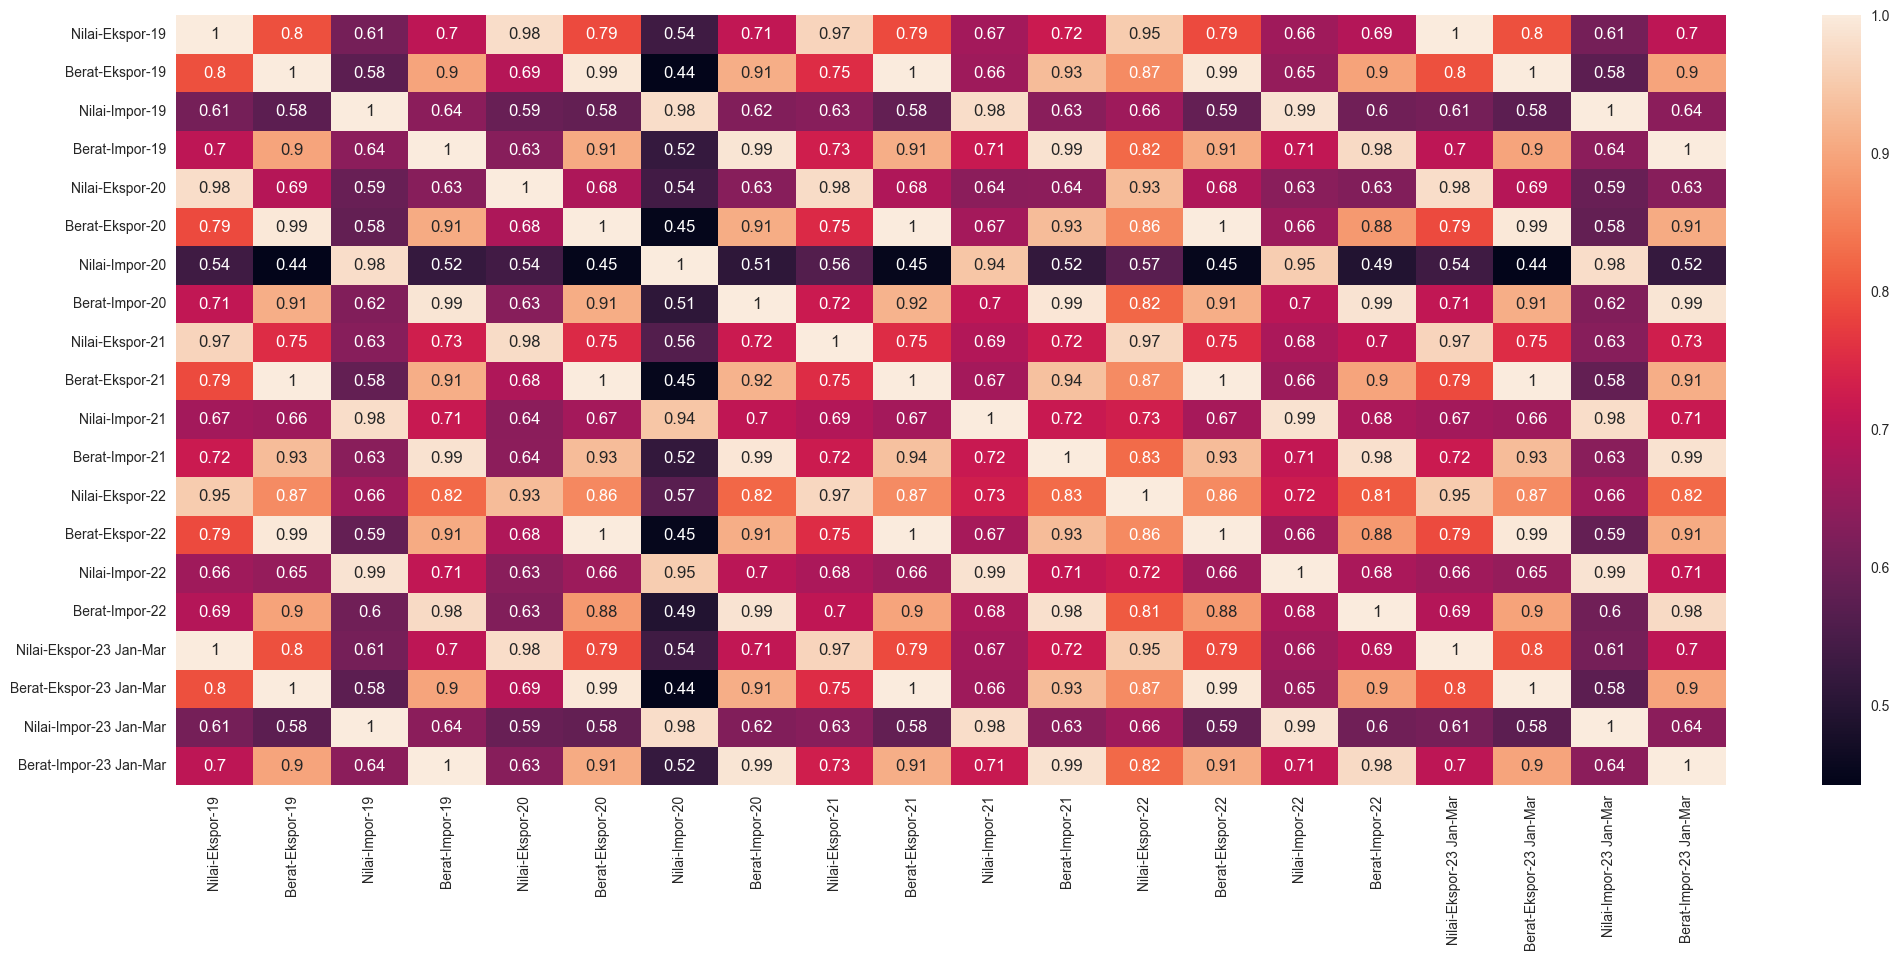

In [37]:
plt.figure(figsize=(25,10))
cor = data.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [67]:
# normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,1:])
scaled_data

array([[-0.37884074, -0.13940247, -0.2145997 , ..., -0.13940247,
        -0.2145997 , -0.23705402],
       [-0.38900807, -0.1399933 , -0.14554848, ..., -0.1399933 ,
        -0.14554848, -0.22764939],
       [ 0.55184884, -0.11879704, -0.33514273, ..., -0.11879704,
        -0.33514273, -0.26575575],
       ...,
       [-0.3934148 , -0.14004475, -0.39463331, ..., -0.14004475,
        -0.39463331, -0.28320163],
       [-0.39458302, -0.14006287, -0.25846886, ..., -0.14006287,
        -0.25846886, -0.27114742],
       [-0.38297338, -0.1400377 , -0.39890016, ..., -0.1400377 ,
        -0.39890016, -0.28336093]])

In [69]:
# Set the seed of the random number generator
np.random.seed(42)

# Compute variance of each attribute
variances = np.var(scaled_data, axis=0)

# Select the top 15 features with highest variance
selected_features = np.argsort(variances)[::-1][:15]

# Select the corresponding features from the data
selected_data = data.iloc[:,selected_features]

In [70]:
selected_data.columns

Index(['Komoditas', 'Berat-Impor-22', 'Berat-Ekspor-20', 'Nilai-Impor-21',
       'Nilai-Ekspor-19', 'Berat-Ekspor-19', 'Berat-Ekspor-23 Jan-Mar',
       'Berat-Ekspor-21', 'Nilai-Ekspor-21', 'Berat-Impor-21',
       'Nilai-Ekspor-23 Jan-Mar', 'Nilai-Impor-20', 'Nilai-Ekspor-20',
       'Berat-Impor-19', 'Berat-Impor-20'],
      dtype='object')

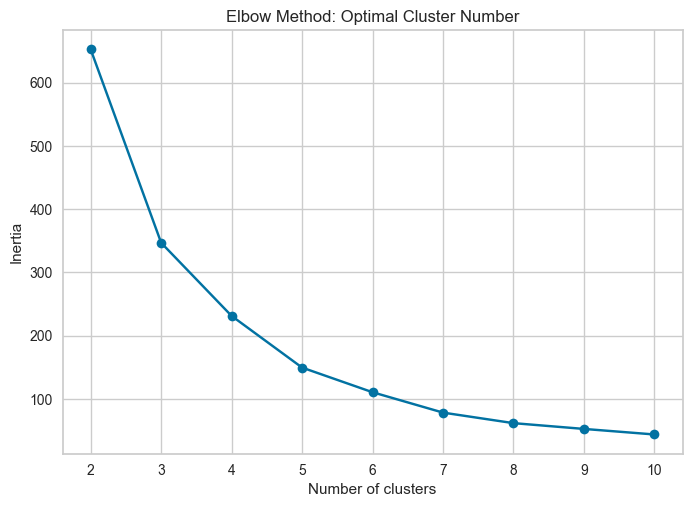

In [71]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_range = range(2, 11)
inertias = []
for n_cluster in cluster_range:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method: Optimal Cluster Number')
plt.show()


In [57]:
scaled_new_data

array([[-0.26164334, -0.13054159, -0.27710298, ..., -0.38891266,
        -0.23705402, -0.26713942],
       [-0.25782429, -0.13112643, -0.24179586, ..., -0.40424864,
        -0.22764939, -0.22493757],
       [-0.25239568, -0.11628841, -0.32747928, ...,  0.32940604,
        -0.26575575, -0.26565351],
       ...,
       [-0.28537267, -0.13113283, -0.39208271, ..., -0.4046598 ,
        -0.28320163, -0.28619664],
       [-0.27013285, -0.13115302, -0.33118434, ..., -0.40599463,
        -0.27114742, -0.28318609],
       [-0.2854352 , -0.1311361 , -0.39186001, ..., -0.40106087,
        -0.28336093, -0.28639955]])

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
cluster_labels = kmeans.fit_predict(scaled_data)
selected_features_name = data.columns[selected_features]
komoditi = data.iloc[:, 0]
komoditi_cluster = pd.DataFrame({'Komoditi': komoditi, 'Cluster': cluster_labels})
komoditi_cluster

,komoditi,Cluster
0,[01] Binatang hidup,0
1,[02] Daging hewan,0
2,"[03] Ikan, krustasea, dan moluska",0
3,"[04] Susu, mentega, dan telur",0
4,[05] Produk hewani,0
...,...,...
93,"[95] Mainan, permainan dan keperluan olahraga",0
94,[96] Berbagai barang buatan pabrik,0
95,"[97] Karya seni, barang kolektor, dan barang a...",0
96,[98] Kendaraan bermotor dan komponennya (terbo...,0


In [89]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

kmeans_pca_data_komoditi = pd.DataFrame({'Komoditi': komoditi, 'PCA1': pca_data[:,0], 'PCA2': pca_data[:,1], 'Cluster': cluster_labels})
kmeans_pca_data_komoditi

,Komoditi,PCA1,PCA2,Cluster
0,[01] Binatang hidup,-1.119750,-0.200299,0
1,[02] Daging hewan,-1.042680,-0.048725,0
2,"[03] Ikan, krustasea, dan moluska",-0.362763,-0.379107,0
3,"[04] Susu, mentega, dan telur",-0.752114,0.128709,0
4,[05] Produk hewani,-1.269473,-0.402357,0
...,...,...,...,...
93,"[95] Mainan, permainan dan keperluan olahraga",-1.107379,-0.304671,0
94,[96] Berbagai barang buatan pabrik,-1.084212,-0.219799,0
95,"[97] Karya seni, barang kolektor, dan barang a...",-1.309394,-0.447505,0
96,[98] Kendaraan bermotor dan komponennya (terbo...,-1.181880,-0.234717,0


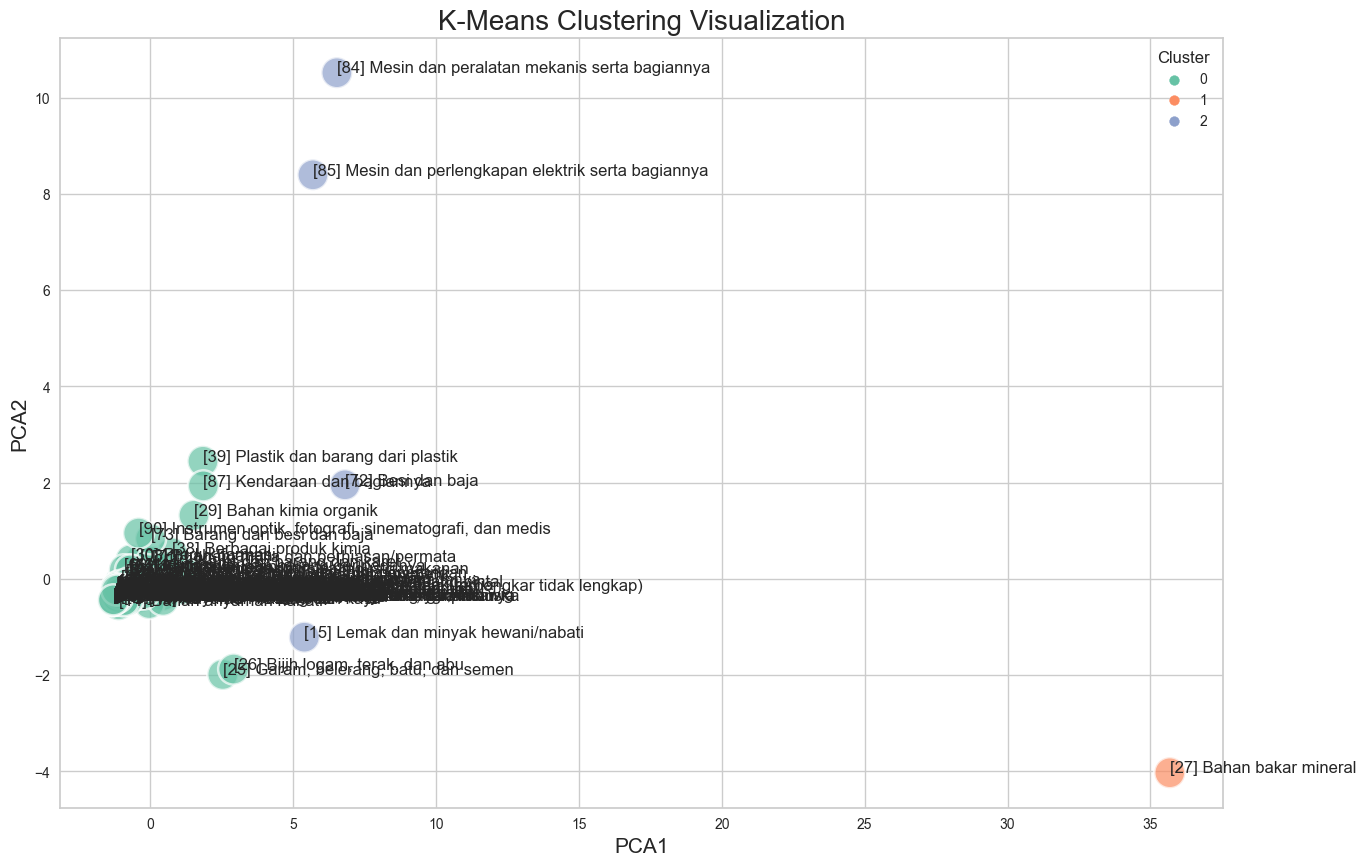

In [90]:
# create visualization and give annotation for each point based on the region
plt.figure(figsize=(15,10))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=kmeans_pca_data_komoditi, palette='Set2', s=500
                ,legend='full', alpha=0.7)
for i, txt in enumerate(kmeans_pca_data_komoditi.Komoditi):
    plt.annotate(txt, (kmeans_pca_data_komoditi.PCA1[i], kmeans_pca_data_komoditi.PCA2[i]))
plt.title('K-Means Clustering Visualization', fontsize=20)
plt.xlabel('PCA1', fontsize=15)
plt.ylabel('PCA2', fontsize=15)
plt.show()

In [84]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# scaled_data is your scaled input data
# cluster_labels are the labels assigned by the clustering model

# Calculate the scores
silhouette = silhouette_score(scaled_data, cluster_labels)
davies_bouldin = davies_bouldin_score(scaled_data, cluster_labels)
calinski_harabasz = calinski_harabasz_score(scaled_data, cluster_labels)

# Print the scores
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Score:", davies_bouldin)
print("Calinski-Harabasz Score:", calinski_harabasz)


Silhouette Score: 0.8289867262856688
Davies-Bouldin Score: 0.6100343464141683
Calinski-Harabasz Score: 220.95908106258977


# COBA - COBA

In [91]:
import plotly.express as px

# Create a DataFrame with the PCA data, cluster labels, and y values
df_plot = pd.DataFrame({'PCA1': kmeans_pca_data_komoditi['PCA1'],
                        'PCA2': kmeans_pca_data_komoditi['PCA2'],
                        'Cluster': cluster_labels,
                        'Komoditi': y})

# Plot the scatter plot
fig = px.scatter(df_plot, x='PCA1', y='PCA2', color='Komoditi', symbol='Cluster',
                 color_discrete_sequence=["orange", "green", "blue"])

# Show the plot
fig.show()


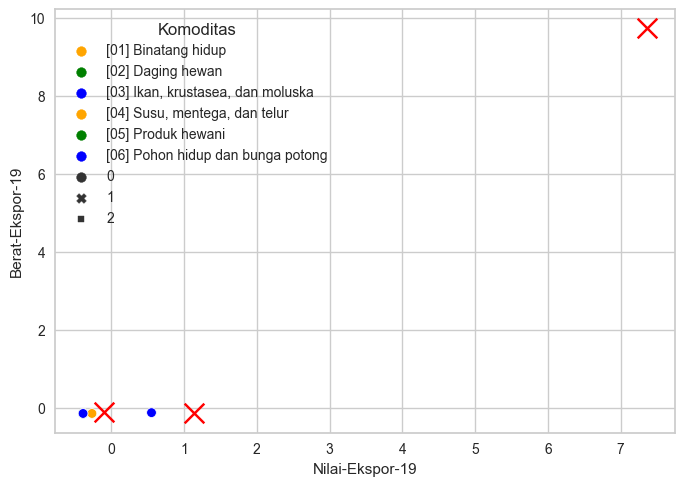

In [92]:
# Creates a scatter plot
sns.scatterplot(
    x='Nilai-Ekspor-19', 
    y='Berat-Ekspor-19',
    data=df, 
    hue=y,
    style=km.labels_,
    palette=["orange", "green", "blue"])

# Adds cluster centers to the same plot
plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker='x',
    s=200,
    c='red')

# k-MEANS: OPTIMIZE VIA SILHOUETTE SCORES
The main challenge in k-means is to find the optimal number of clusters. We can set up a `GridSearchCV` object to search for the optimal parameters. For k-Mmeans, we require a custom scorer that computes the silhouette value for different number of clusters specified by `n_clusters`. The custom scorer is called `s2()` in the code below, where it uses `silhouette_score()` from the `sklearn.metrics` library to compute a score for an instance `X`. 

A silhouette score is a value in [-1,+1]. It is a means for comparing how similar an instance is to its corresponding cluster compared to its similarity with other clusters. Formally, it takes into account `cohesion` and `separation` to compute a silhouette value. A +1 or close to this score value indicates better clusters.

In [93]:
# Sets up the custom scorer
def s2(estimator,X):
    return silhouette_score(X, estimator.predict(X))

# List of values for the parameter `n_clusters`
param = range(2,10)

# KMeans object
km = KMeans(random_state=0, init='k-means++', n_init='auto')

# Sets up GridSearchCV object and stores in grid variable
grid = GridSearchCV(
    km,
    {'n_clusters': param},
    scoring=s2,
    cv=2)

# Fits the grid object to data
grid.fit(scaled_data)

# Accesses the optimum model
best_km = grid.best_estimator_

# Displays the optimum model
best_km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'auto',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

## Plot of Scores for Different Number of Clusters
The `grid` object has an attribute `cv_results_` through which the scores for different `n_clusters` can be accessed.

Text(0, 0.5, 'Silhouette Score')

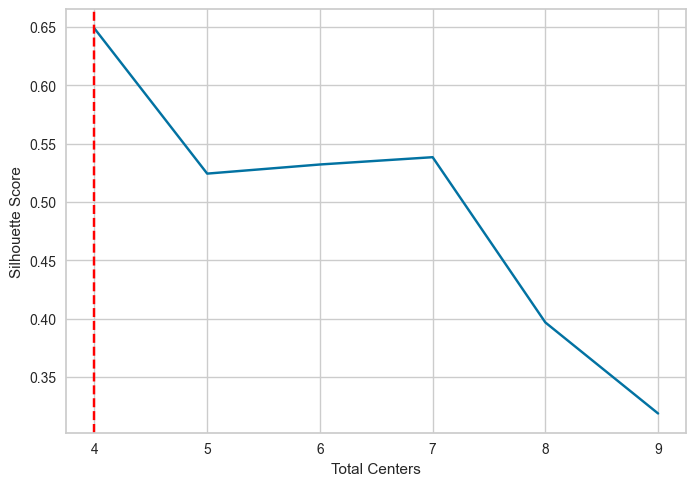

In [94]:
# Plot mean_test_scores vs. n_clusters
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Draw a vertical line, where the best model is
plt.axvline(
    x=best_km.n_clusters, 
    color='red',
    ls='--')

# Adds labels to the plot
plt.xlabel('Total Centers')
plt.ylabel('Silhouette Score')